<h1>Workshop 3, Part II - Twitter Sentiment Analysis

For this workshop, I was unsuccessful in collecting the tweet data using tweepy. I shall therefore be using the Kaggle sentiment analysis dataset provided.<p>
The errors I faced using the Twitter developer API and the script to scrape the data into a text file, would not function on my computer and after troubleshooting I am unable to determine the cause.<p>


In [1]:
import numpy as np
import pandas as pd
import codecs
import warnings

warnings.filterwarnings('ignore')

In [2]:
# This code would not work with my dataset set to utf-8 so we shall be using latin-1.
tweets = codecs.open("Tweets.txt", "r", "latin-1")

In [3]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# Preparing tweets for Wordcloud

text = []
tc = 0
for t in tweets:
    text.append(t.lower())
    tc +=1

all_text = " ".join(t for t in text)
print("Total words in all the tweets: ", len(all_text))

Total words in all the tweets:  3854583
Total words in all the tweets:  3854583


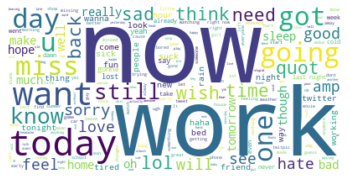

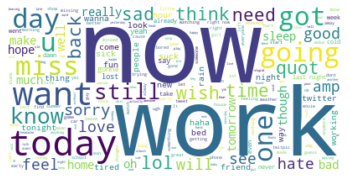

In [5]:
stopwords = set(STOPWORDS)
stopwords.update(["br","im", 'RT', 'https', 'gt', 'go'])

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")

In [6]:
pos_tweets = []
neg_tweets = []
irrelevant = []

wordList = []

for t in text:
    wordList.append(t.split())

In [7]:
def checkPos(strList):
    if 'happy' in strList:
        return strList

def checkNeg(strList):
    if 'sad' in strList:
        return strList

In [8]:
for word in wordList:
    str1 = " "
    if checkPos(word):
        str1 = str1.join(word)
        pos_tweets.append(str1)
    elif checkNeg(word):
        str1 = str1.join(word)
        neg_tweets.append(str1)
else:
    irrelevant.append(str1)

In [9]:
print(len(pos_tweets))
print(len(neg_tweets))

269
1210
269
1210


In [10]:
posLabel = pd.DataFrame(columns=['positive'])
negLabel = pd.DataFrame(columns=['negative'])

In [11]:
posLabel['positive'] = pos_tweets
posLabel.head()

,positive
0,is not happy wiv this weather
1,@enjoyingjoy papers are done. had a last minut...
2,hates happy kids. thanks for reminding me how ...
3,morning twittererererers!! why does it have to...
4,ahhhh. i missed seeing jb on sportscenter. &am...


,positive
0,is not happy wiv this weather
1,@enjoyingjoy papers are done. had a last minut...
2,hates happy kids. thanks for reminding me how ...
3,morning twittererererers!! why does it have to...
4,ahhhh. i missed seeing jb on sportscenter. &am...


In [12]:
negLabel['negative'] = neg_tweets
negLabel.head()

,negative
0,the last two upadates were about chocolate..ho...
1,i think it's stopped - i hate rumours kinda sa...
2,"""debris, oil slick from air france flight foun..."
3,"""no homework, no stress, nothing!! i love it! ..."
4,last time i was on i had 122 followers. i got ...


,negative
0,the last two upadates were about chocolate..ho...
1,i think it's stopped - i hate rumours kinda sa...
2,"""debris, oil slick from air france flight foun..."
3,"""no homework, no stress, nothing!! i love it! ..."
4,last time i was on i had 122 followers. i got ...


In [13]:
posLabel.to_csv('positive.csv')
negLabel.to_csv('negative.csv')

<h3>Q1. Form wordclouds on positive and negative tweets.

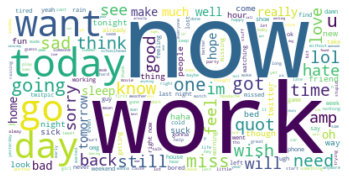

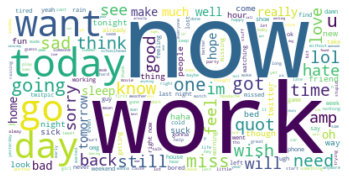

In [14]:
df = pd.read_csv('positive.csv')
poswords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=poswords, background_color="white").generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud.to_file("posword.png")

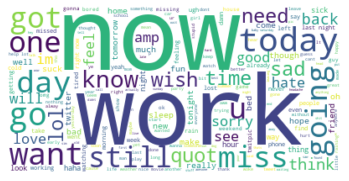

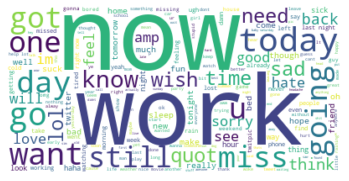

In [15]:
df = pd.read_csv('negative.csv')
negwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=negwords, background_color="white").generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud.to_file("negwords.png")

<h3>Q2. Form wordclouds on positive and negative tweets after updating stopword as appropriate. Write a brief comment (3-4 lines) on your observation.

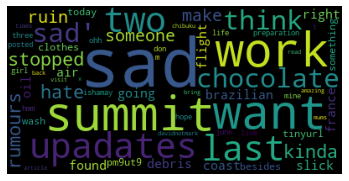

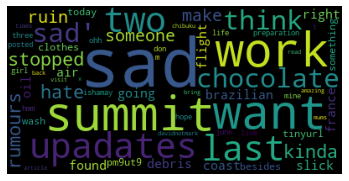

In [16]:
ddf = pd.read_csv('positive.csv')

text = df.values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("posword2.png")

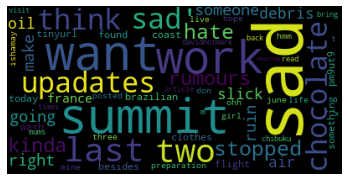

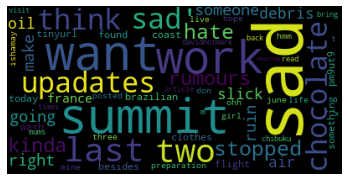

In [17]:
df = pd.read_csv('negative.csv')

text = df.values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("negwords2.png")

<h6>Q2 Observations</h6>
<p>Whilst there are some similarities in the repeated words, there are some differences that can be highlighted,</p>
<p>such as the words; day, summit and, really appearing in the positive word cloud.</p>
<p>In the negative word cloud, words like; summit, chocolate and, updates.</p>
<p>The most stand out similarity is that the word sad appears in both the positive and negative wordclouds.</p>

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#importing lexicon for it to use in sentiment analysis
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

True

In [19]:
print(len(text))

1210
1210


<h2>Sentiment Analysis of tweets

In [20]:
sid = SentimentIntensityAnalyzer()
c = 0
for t in text[:10]:
    c+=1
    print(c, t)
    ss = sid.polarity_scores(t)

    print(ss)

    if(ss['compound'] >= 0.05):
        print('positive')
    elif(ss['compound'] <= -0.05):
        print('negative')
    else:
        print('neutral')
    print('\n')

1 [0 'the last two upadates were about chocolate..how sad']
1 [0 'the last two upadates were about chocolate..how sad']


AttributeError: 'numpy.ndarray' object has no attribute 'encode'

AttributeError: 'numpy.ndarray' object has no attribute 'encode'

<h2> Report

<b>Write 600-words evaluation summary on the performance of the VADER on test set.</b>
<p>Prepare a test set by manually identifying min 20 tweets as postiive and 20 as negative.</p>

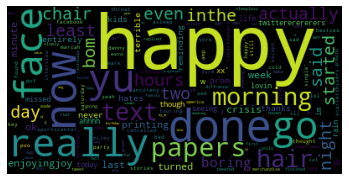

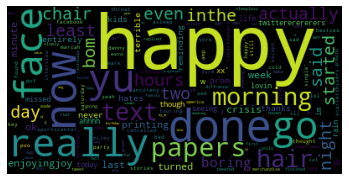

In [21]:
df = pd.read_csv('positive_2.csv')

text = df.values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

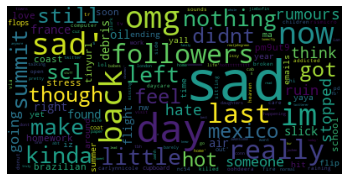

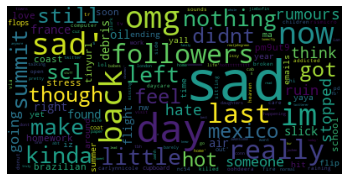

In [22]:
df = pd.read_csv('negative_2.csv')

text = df.values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [23]:
df.head()

,the last two upadates were about chocolate..how sad
0,i think it's stopped - i hate rumours kinda sa...
1,"""debris, oil slick from air france flight foun..."
2,"""no homework, no stress, nothing!! i love it! ..."
3,last time i was on i had 122 followers. i got ...
4,omg yall 2 day was ma last day at scl 4 this y...


,the last two upadates were about chocolate..how sad
0,i think it's stopped - i hate rumours kinda sa...
1,"""debris, oil slick from air france flight foun..."
2,"""no homework, no stress, nothing!! i love it! ..."
3,last time i was on i had 122 followers. i got ...
4,omg yall 2 day was ma last day at scl 4 this y...


<h6>Report.</h6>
<p>Evaluating the VADER sentiment analysis performed through this project, we can see that it is not without flaw. This can be shown by some of the negative tweets not recognizing the context and being falsely labelled as negative when they could be positive or neutral.

For example, one tweet from the negative values is "no homework, no stress, nothing!! i love it! school is soon ending! yaya just 5 days left, little sad though ". It is clear to see that the majority of this tweet is positive and only the context, that we can understand being the return to school, makes shows that this should be mostly marked as a positive or neutral tweet.

It seems that the algorithm uses the word sad as the first 5 tweets in the negative set all use the word but overall, there is merit to this, as a large volume of the tweets containing this are negative tweets.

This could be refined by using a larger sample of tweets, with the most benefit being from tweets that are between neutral and positive, and neutral and negative.
